# Question 1

## Prompt: Given a list of distinct ints, output a list of all combinations

Not sure if this exists on Leetcode but I figured it would be a good starter problem.

## Approach:
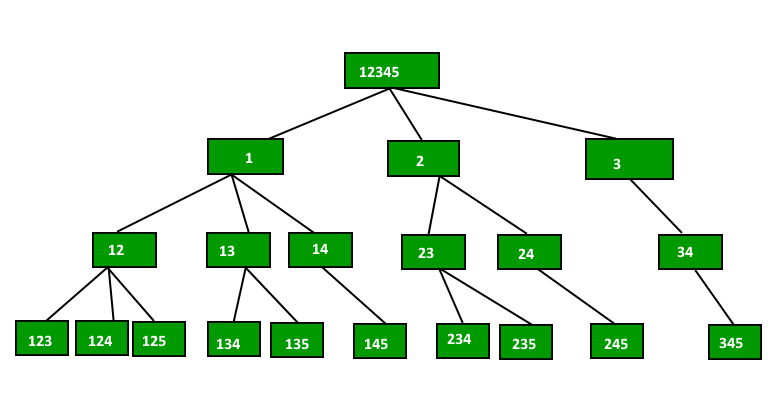
Create a recursive helper that takes a list of integers and checks whether or not the list is the length desired.
This is the base case.

Otherwise we loop over the input list and for each element, we pick that element for one of our combinations and pass the rest of the array to a recursive call.

Call this helper from a main method that generates combinations for all lengths up to the length of the input list.

In [23]:
from typing import List

class Solution:
    def __init__(self):
        self.combinations = []
        
    def generate_all_combinations(self, nums: List) -> List:
        for possible_comb_length in range(1, len(nums) + 1):
            self.generate_combinations(nums, [], possible_comb_length)
            
        return self.combinations
        
    def generate_combinations(self, nums: List, combination_so_far: List, k: int) -> None:
        if len(combination_so_far) == k:
            self.combinations.append(combination_so_far.copy())
            return
        
        for idx in range(len(nums)):
            combination_so_far.append(nums[idx])
            self.generate_combinations(nums[idx + 1::], combination_so_far, k)
            combination_so_far.pop()
        
s = Solution()
s.generate_all_combinations([1, 2, 3, 4, 5])

[[1],
 [2],
 [3],
 [4],
 [5],
 [1, 2],
 [1, 3],
 [1, 4],
 [1, 5],
 [2, 3],
 [2, 4],
 [2, 5],
 [3, 4],
 [3, 5],
 [4, 5],
 [1, 2, 3],
 [1, 2, 4],
 [1, 2, 5],
 [1, 3, 4],
 [1, 3, 5],
 [1, 4, 5],
 [2, 3, 4],
 [2, 3, 5],
 [2, 4, 5],
 [3, 4, 5],
 [1, 2, 3, 4],
 [1, 2, 3, 5],
 [1, 2, 4, 5],
 [1, 3, 4, 5],
 [2, 3, 4, 5],
 [1, 2, 3, 4, 5]]

# Explanation

The trick here is to only look forward when considering what to pass in for the recursive call. The reason is for combinations, order does not matter whereas for permutations, order does.

# Question 2:

## Prompt: Given an encoded string, return its decoded form
The encoding rule is: `k[encoded_string]`, where the encoded_string inside the square brackets is being repeated exactly _`k`_ times. Note that _`k`_ is guaranteed to be a positive integer.

You may assume that the input string is always valid; No extra white spaces, square brackets are well-formed, etc.

Furthermore, you may assume that the original data does not contain any digits and that digits are only for those repeat numbers, _`k`_. For example, there won't be input like `3a` or `2[4]`.

[Leetcode link](https://leetcode.com/problems/decode-string/)

## Approach:
We can go about this by processing each character in the string. We will utilise a stack to store what we should use next when processing each character.

In [24]:
class Solution:
    def decodeString(self, s: str) -> str:
        stack = []
        curr = ''
        multiplier = ''
        for ch in s:
            if ch.isnumeric():
                if curr:
                    stack.append(curr)
                    curr = ''
                multiplier += ch
            elif ch == '[':
                stack.append(multiplier)
                multiplier = ''
            elif ch == ']':
                while not stack[-1].isdigit():
                    curr = stack.pop() + curr
                m = int(stack.pop())
                curr = m * curr
            else:
                curr += ch
            
        return ''.join(stack) + curr
    

s = Solution()
"aabbbccccddddd" == s.decodeString("2[a]3[b]4[c]5[d]")

True

## July 19th, 2020 submission:
#### Runtime: 24 ms, faster than 93.73% of Python3 online submissions for Decode String.
#### Memory Usage: 13.9 MB, less than 37.03% of Python3 online submissions for Decode String.

# Explanation

Faster than 93% probably cause our solution is O(n) runtime.
Probably only 37% better memory wise because we use a stack to track things.

Think of this question like taking inputs to a calculator.
eg. Given a string that represents some set of operations, what is the final output value.